# Importing Libraries

**Configuration packages**

In [172]:
import warnings
warnings.filterwarnings('ignore')

**Classical Libraries**

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Machine Learning Packages**

In [176]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

# Reading the dataset

In [178]:
# Loading the dataset
pokemon_data= pd.read_csv('Pokemon.csv')

In [179]:
#Reading the dataset
pokemon_data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


# `Exploratory Data Analysis`

In [181]:
# Information of the data
pokemon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


**Data Insights:**
*We can observe that column names have extra whitespaces. We would not be able to perform any operation, until and unless we remove those spaces.*

## `Data Cleaning`

In [184]:
# Renaming the column name to lower case
pokemon_data.rename(columns= {'#': 'pokemonID', 'Type 1': 'type_1', 'Type 2': 'type_2', 'Sp. Atk': 'sp.atk', 'Sp. Def': 'sp.def',
                             'Name': 'name', 'Total': 'total', 'HP': 'hp', 'Attack': 'attack', 'Defense': 'defense',
                              'Speed': 'speed', 'Generation': 'generation', 'Legendary': 'legendary'}, inplace=True)

# Checking for all the columns have been renamed properly
pokemon_data.head()

,pokemonID,name,type_1,type_2,total,hp,attack,defense,sp.atk,sp.def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [185]:
# Removing unwanted features for model building process
pokemon_data= pokemon_data.drop('pokemonID', axis=1)

## Working on `Null values`

In [187]:
# Checking for null values
pokemon_data.isna().sum()

name            0
type_1          0
type_2        386
total           0
hp              0
attack          0
defense         0
sp.atk          0
sp.def          0
speed           0
generation      0
legendary       0
dtype: int64

In [188]:
# Checking for most frequent item in the type_2 column
pokemon_data['type_2'].mode()

0    Flying
Name: type_2, dtype: object

In [189]:
# Replacing the null values with the most frequent item
pokemon_data['type_2'].fillna(pokemon_data['type_2'].mode()[0], inplace=True)

# Checking for null values have been removed properly
pokemon_data.isna().sum()

name          0
type_1        0
type_2        0
total         0
hp            0
attack        0
defense       0
sp.atk        0
sp.def        0
speed         0
generation    0
legendary     0
dtype: int64

## Working on `Duplicate values`

In [191]:
# Checking for duplicate values
pokemon_data.duplicated().sum()

0

## Working on `Outliers`

In [193]:
# Description of the data
pokemon_data.describe()

,total,hp,attack,defense,sp.atk,sp.def,speed,generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


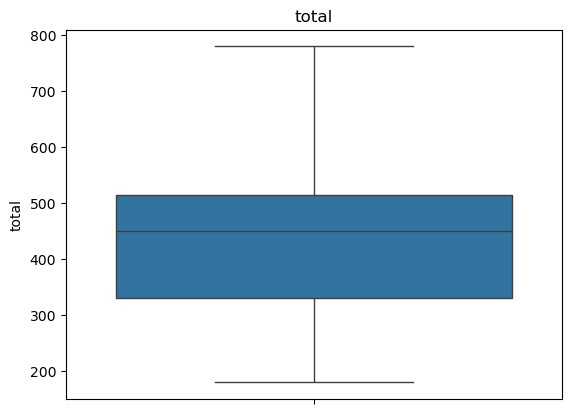

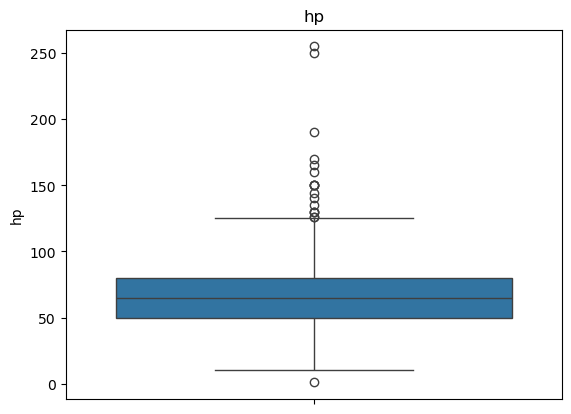

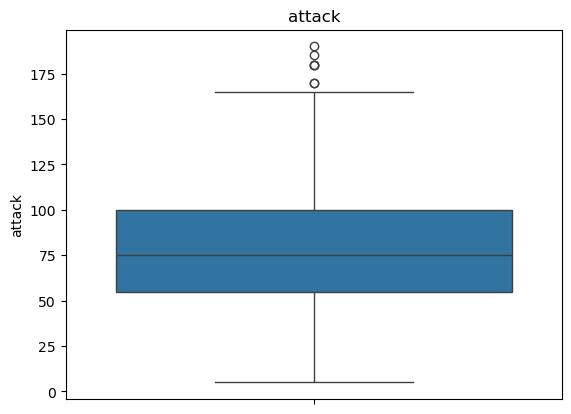

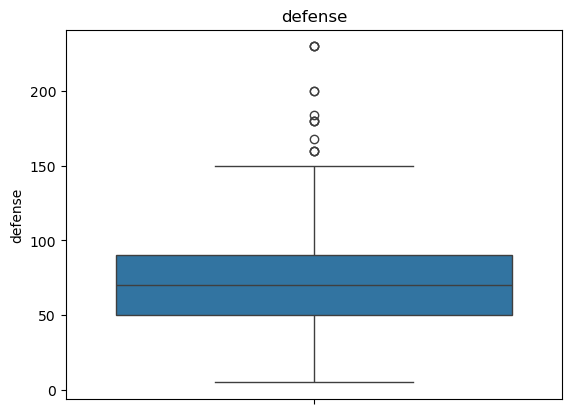

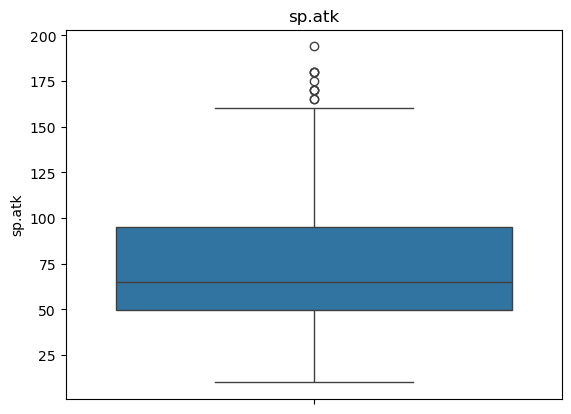

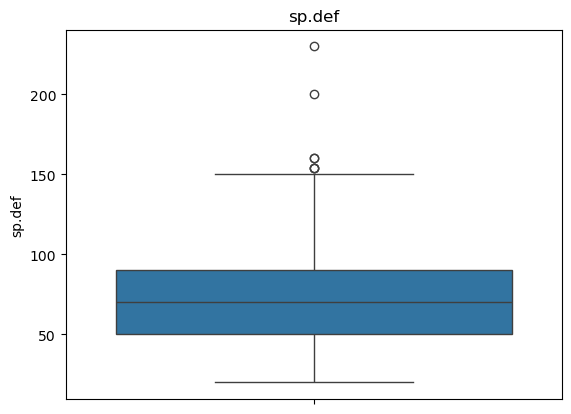

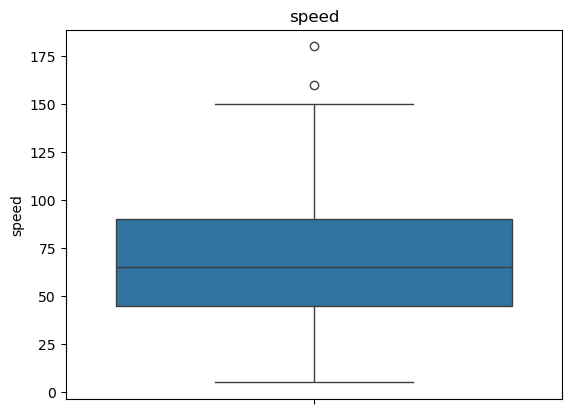

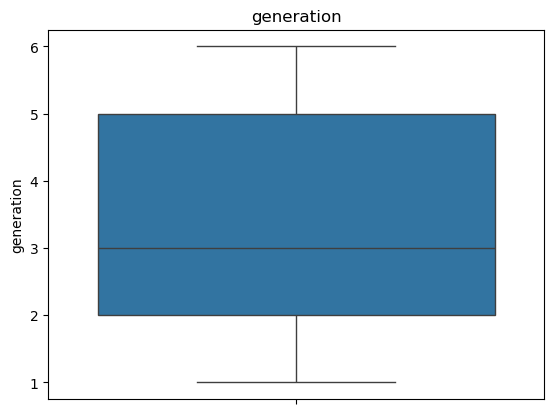

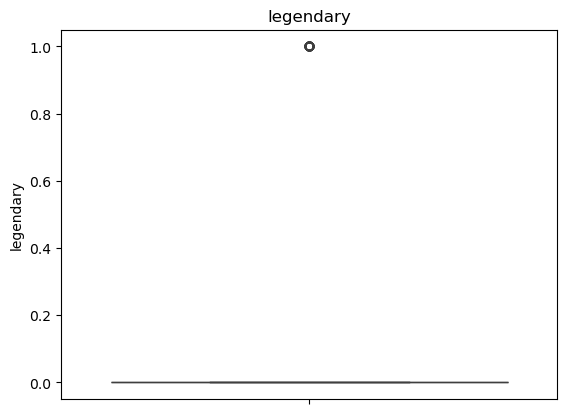

In [194]:
# Checking for outliers
for i in pokemon_data.columns:
    if pokemon_data[i].dtype != 'object':
        sns.boxplot(pokemon_data[i])
        plt.title(i)
        plt.show()

**Tree based algorithms handle outliers automatically.**

## `Label Encoding`

In [197]:
# Checking data types of each column
pokemon_data.dtypes

name          object
type_1        object
type_2        object
total          int64
hp             int64
attack         int64
defense        int64
sp.atk         int64
sp.def         int64
speed          int64
generation     int64
legendary       bool
dtype: object

In [198]:
# Storing only object and bool type value into a variable for label encoding
cat_cols= pokemon_data.select_dtypes(['object', 'bool'])

In [199]:
# Encoding all the categorical values into numerical
le= LabelEncoder()
for i in cat_cols:
    pokemon_data[i]= le.fit_transform(pokemon_data[i])
    print(le.classes_) # will print the original categorical values in the order they are fitted

['Abomasnow' 'AbomasnowMega Abomasnow' 'Abra' 'Absol' 'AbsolMega Absol'
 'Accelgor' 'AegislashBlade Forme' 'AegislashShield Forme' 'Aerodactyl'
 'AerodactylMega Aerodactyl' 'Aggron' 'AggronMega Aggron' 'Aipom'
 'Alakazam' 'AlakazamMega Alakazam' 'Alomomola' 'Altaria'
 'AltariaMega Altaria' 'Amaura' 'Ambipom' 'Amoonguss' 'Ampharos'
 'AmpharosMega Ampharos' 'Anorith' 'Arbok' 'Arcanine' 'Arceus' 'Archen'
 'Archeops' 'Ariados' 'Armaldo' 'Aromatisse' 'Aron' 'Articuno' 'Audino'
 'AudinoMega Audino' 'Aurorus' 'Avalugg' 'Axew' 'Azelf' 'Azumarill'
 'Azurill' 'Bagon' 'Baltoy' 'Banette' 'BanetteMega Banette' 'Barbaracle'
 'Barboach' 'Basculin' 'Bastiodon' 'Bayleef' 'Beartic' 'Beautifly'
 'Beedrill' 'BeedrillMega Beedrill' 'Beheeyem' 'Beldum' 'Bellossom'
 'Bellsprout' 'Bergmite' 'Bibarel' 'Bidoof' 'Binacle' 'Bisharp'
 'Blastoise' 'BlastoiseMega Blastoise' 'Blaziken' 'BlazikenMega Blaziken'
 'Blissey' 'Blitzle' 'Boldore' 'Bonsly' 'Bouffalant' 'Braixen' 'Braviary'
 'Breloom' 'Bronzong' 'Bronzor' 'Bu

In [200]:
# Confirming that all the categorical values have been encoded to numerical
pokemon_data.dtypes

name          int32
type_1        int32
type_2        int32
total         int64
hp            int64
attack        int64
defense       int64
sp.atk        int64
sp.def        int64
speed         int64
generation    int64
legendary     int64
dtype: object

In [201]:
pokemon_data.head()

,name,type_1,type_2,total,hp,attack,defense,sp.atk,sp.def,speed,generation,legendary
0,80,9,13,318,45,49,49,65,65,45,1,0
1,329,9,13,405,60,62,63,80,80,60,1,0
2,745,9,13,525,80,82,83,100,100,80,1,0
3,746,9,13,625,80,100,123,122,120,80,1,0
4,102,6,7,309,39,52,43,60,50,65,1,0


## `Feature Engineering`

**Scaling data before Feature Selection**

In [204]:
# Seperating the input and output features
X= pokemon_data.drop('legendary', axis=1)
y= pokemon_data[['legendary']]

In [205]:
X.head()

,name,type_1,type_2,total,hp,attack,defense,sp.atk,sp.def,speed,generation
0,80,9,13,318,45,49,49,65,65,45,1
1,329,9,13,405,60,62,63,80,80,60,1
2,745,9,13,525,80,82,83,100,100,80,1
3,746,9,13,625,80,100,123,122,120,80,1
4,102,6,7,309,39,52,43,60,50,65,1


In [206]:
y.head()

,legendary
0,0
1,0
2,0
3,0
4,0


In [207]:
# Scaling of the data
scaler= StandardScaler()
scaled_X= scaler.fit_transform(X)
scaled_X

array([[-1.38347666, -0.08382843,  1.53643401, ..., -0.24818854,
        -0.80150318, -1.39963712],
       [-0.30527419, -0.08382843,  1.53643401, ...,  0.29115635,
        -0.28501525, -1.39963712],
       [ 1.49606005, -0.08382843,  1.53643401, ...,  1.01028289,
         0.40363531, -1.39963712],
       ...,
       [-0.37022615,  0.81273233,  0.02195987, ...,  2.08897269,
         0.05931003,  1.61195431],
       [-0.36589602,  0.81273233, -2.09830391, ...,  2.08897269,
         0.40363531,  1.61195431],
       [ 1.54369149, -0.62176489,  2.74801332, ...,  0.65071962,
         0.05931003,  1.61195431]])

In [208]:
# fitting the LDA model for feature selection
lda= LinearDiscriminantAnalysis(n_components=1)
lda_X= lda.fit_transform(scaled_X, y)

In [209]:
# Fetching the lda transformed data
lda_X

array([[-1.44376510e+00],
       [-4.49626347e-01],
       [ 9.78109412e-01],
       [ 1.90016844e+00],
       [-1.37562393e+00],
       [-5.03385675e-01],
       [ 7.10661747e-01],
       [ 1.72306665e+00],
       [ 2.05817202e+00],
       [-1.02113663e+00],
       [-1.26331422e-01],
       [ 3.76738461e-01],
       [ 1.60029118e+00],
       [-2.76888440e+00],
       [-2.43624813e+00],
       [-4.70220502e-01],
       [-2.26778866e+00],
       [-2.61678429e+00],
       [-1.00454674e+00],
       [-3.77298035e-01],
       [-1.75177203e+00],
       [-9.27800253e-01],
       [ 2.23802889e-01],
       [ 1.64768898e+00],
       [-1.70620908e+00],
       [-2.71806644e-01],
       [-1.52943599e+00],
       [-3.20091287e-01],
       [-1.62796175e+00],
       [-4.46071925e-01],
       [-9.59171430e-01],
       [ 7.03491740e-01],
       [-1.65300643e+00],
       [-3.23050038e-01],
       [-1.66197770e+00],
       [-8.62777284e-01],
       [ 3.21181189e-01],
       [-1.57942890e+00],
       [-7.7

In [210]:
# Checking the shape of the data
lda_X.shape

(800, 1)

In [211]:
# Getting a list of importances of each column
lda.coef_

array([[ 4.60617892e-01,  9.32735588e-04, -1.70059444e-01,
         7.50769441e-01,  3.91650275e-02,  4.24574581e-01,
         1.21668613e-01,  1.07145336e+00,  4.98215638e-01,
         4.13771188e-01,  2.97504410e-01]])

In [212]:
# Shape of the lda coefficients data
lda.coef_.shape

(1, 11)

In [213]:
# Converting all the negative values to absolute values
np.abs(lda.coef_)

array([[4.60617892e-01, 9.32735588e-04, 1.70059444e-01, 7.50769441e-01,
        3.91650275e-02, 4.24574581e-01, 1.21668613e-01, 1.07145336e+00,
        4.98215638e-01, 4.13771188e-01, 2.97504410e-01]])

In [214]:
# Converting all the exponential vaues
np.exp(np.abs(lda.coef_))

array([[1.58505307, 1.00093317, 1.18537531, 2.11862955, 1.03994209,
        1.52893984, 1.12937978, 2.91961967, 1.64578198, 1.51251101,
        1.34649431]])

In [215]:
# flattening the above transformed data into 1d array and storing the final data into a variable
lda_coefficients= np.exp(np.abs(lda.coef_)).flatten()

In [216]:
# fetching the lda coefficients data
lda_coefficients

array([1.58505307, 1.00093317, 1.18537531, 2.11862955, 1.03994209,
       1.52893984, 1.12937978, 2.91961967, 1.64578198, 1.51251101,
       1.34649431])

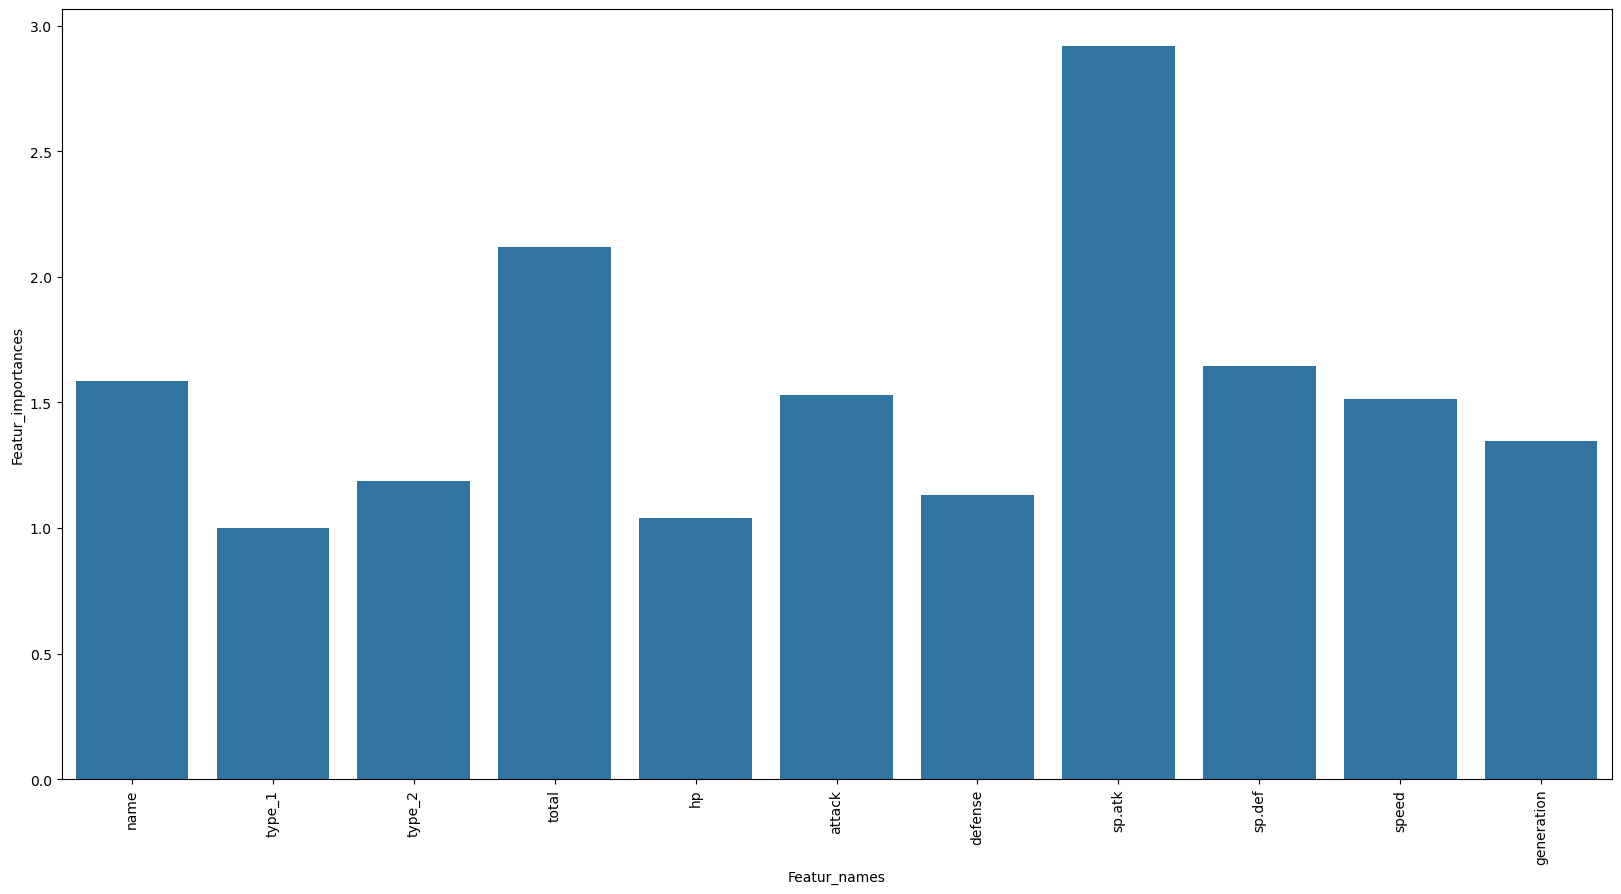

In [217]:
# Visualizing the lda coefficients data
plt.figure(figsize=(20,10))
sns.barplot(x=X.columns, y=lda_coefficients)
plt.xlabel('Featur_names')
plt.ylabel('Featur_importances')
plt.xticks(rotation=90)
plt.show()

In [218]:
X.columns

Index(['name', 'type_1', 'type_2', 'total', 'hp', 'attack', 'defense',
       'sp.atk', 'sp.def', 'speed', 'generation'],
      dtype='object')

In [219]:
# preparing a dataframe by taking all the features and their coefficient values
df_features= pd.DataFrame({'Feature_names': X.columns, 'Feature_importances': lda_coefficients})

In [220]:
# Fetching the dataframe of lda coefficients data
df_features

,Feature_names,Feature_importances
0,name,1.585053
1,type_1,1.000933
2,type_2,1.185375
3,total,2.118630
4,hp,1.039942
5,attack,1.528940
6,defense,1.129380
7,sp.atk,2.919620
8,sp.def,1.645782
9,speed,1.512511


In [221]:
# getting the most important features from the dataframe of lda coefficients
best_features= df_features.nlargest(10, 'Feature_importances') # 10

In [222]:
# getting the final dataframe of best features
best_features

,Feature_names,Feature_importances
7,sp.atk,2.919620
3,total,2.118630
8,sp.def,1.645782
0,name,1.585053
5,attack,1.528940
9,speed,1.512511
10,generation,1.346494
2,type_2,1.185375
6,defense,1.129380
4,hp,1.039942


In [223]:
# Fetching the best features from the dataset
X= X[best_features['Feature_names']]
y= pokemon_data[['legendary']]

In [224]:
X

,sp.atk,total,sp.def,name,attack,speed,generation,type_2,defense,hp
0,65,318,65,80,49,45,1,13,49,45
1,80,405,80,329,62,60,1,13,63,60
2,100,525,100,745,82,80,1,13,83,80
3,122,625,120,746,100,80,1,13,123,80
4,60,309,50,102,52,65,1,7,43,39
...,...,...,...,...,...,...,...,...,...,...
795,100,600,150,160,100,50,6,4,150,50
796,160,700,110,161,160,110,6,4,110,50
797,150,600,130,314,110,70,6,8,60,80
798,170,680,130,315,160,80,6,1,60,80


In [225]:
y

,legendary
0,0
1,0
2,0
3,0
4,0
...,...
795,1
796,1
797,1
798,1


# `Model Building`

In [227]:
# splitting the data into training and testing
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=1)

In [228]:
# Checking the shape of the training data
X_train.shape, y_train.shape

((640, 10), (640, 1))

In [229]:
# Checking the shape of the testing data
X_test.shape, y_test.shape

((160, 10), (160, 1))

**Scaling the data before model building**

In [231]:
# scaling of the splitted data
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [232]:
# Conforming the training data has been scaled
X_train

array([[ 2.35487061,  1.36354748,  2.06094391, ...,  0.01858813,
        -0.45340716,  0.38654016],
       [-0.52790902, -0.12967156,  0.28813659, ...,  1.80304873,
         0.83930064, -0.36447897],
       [-0.22445853, -0.97582901, -0.24370561, ...,  1.50563863,
        -0.8089018 , -0.92774333],
       ...,
       [-1.13480999, -1.0836726 , -1.30739   , ..., -0.27882197,
        -0.77658411,  0.01103059],
       [ 0.07899195,  0.53398135,  0.11085586, ..., -0.27882197,
         0.03135826,  0.76204973],
       [-0.98308475, -1.34913377, -1.13010927, ..., -0.27882197,
        -1.09976106, -0.89019237]])

In [233]:
# Conforming the testing data has been scaled
X_test

array([[ 2.62797604,  1.64559996,  1.52910171, ..., -0.27882197,
         0.12831135,  0.31143825],
       [ 0.59485778,  0.48420738,  0.46541732, ...,  0.91081843,
         0.03135826,  0.76204973],
       [-1.13480999, -1.83028212, -0.95282853, ..., -0.27882197,
        -1.29366723, -1.30325289],
       ...,
       [ 1.71762458,  1.19763425,  0.64269805, ..., -0.87364217,
         0.51612369,  0.79960069],
       [-1.43826048, -1.0836726 , -1.30739   , ..., -0.27882197,
        -0.61499563,  0.19878538],
       [-0.52790902, -0.87628107, -0.59826707, ..., -0.27882197,
        -0.77658411, -1.11549811]])

## `Logistic Regression`

In [235]:
# training the model
logReg_model= LogisticRegression()
logReg_model.fit(X_train, y_train)

LogisticRegression()

In [236]:
# Predicting the model for training and testing data
y_pred= logReg_model.predict(X_test)
y_pred_train= logReg_model.predict(X_train)

In [237]:
# Checking the performance of the model

# Accuracy of the model
print(f'Accuracy of the testing data: {accuracy_score(y_test, y_pred)}')
print(f'Accuracy of the training data: {accuracy_score(y_train, y_pred_train)}')

print()
# Minimizing the False predictions of the model
print(f'Minimizing of the False Positve values to: {precision_score(y_test, y_pred)}')
print(f'Minimizing of the False Negative values to: {recall_score(y_test, y_pred)}')

print()
# Minimizing of the False predictions at once 
print(f'Minimizing of the False Predictions values to: {f1_score(y_test, y_pred)}')


Accuracy of the testing data: 0.94375
Accuracy of the training data: 0.9546875

Minimizing of the False Positve values to: 0.7142857142857143
Minimizing of the False Negative values to: 0.4166666666666667

Minimizing of the False Predictions values to: 0.5263157894736842


## `Decision tree`

In [239]:
# training the model
dtree_model= DecisionTreeClassifier()
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [240]:
# Predicting the model for training and testing data
y_pred1= dtree_model.predict(X_test)
y_pred_train1= dtree_model.predict(X_train)

In [241]:
# Checking the performance of the model

# Accuracy of the model
print(f'Accuracy of the testing data: {accuracy_score(y_test, y_pred1)}')
print(f'Accuracy of the training data: {accuracy_score(y_train, y_pred_train1)}')

print()
# Minimizing the False predictions of the model
print(f'Minimizing of the False Positve values to: {precision_score(y_test, y_pred1)}')
print(f'Minimizing of the False Negative values to: {recall_score(y_test, y_pred1)}')

print()
# Minimizing of the False predictions at once 
print(f'Minimizing of the False Predictions values to: {f1_score(y_test, y_pred1)}')

print('\n')
# Checking the overall performance of the model
print(f'            CLASSIFICATION REPORT \n{classification_report(y_test, y_pred1)}')

print()
# Cross validation
print(f'           Cross Validation Score \n{cross_val_score(dtree_model, X_train, y_train, cv=8)}')

Accuracy of the testing data: 0.94375
Accuracy of the training data: 1.0

Minimizing of the False Positve values to: 0.6363636363636364
Minimizing of the False Negative values to: 0.5833333333333334

Minimizing of the False Predictions values to: 0.6086956521739131


            CLASSIFICATION REPORT 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       148
           1       0.64      0.58      0.61        12

    accuracy                           0.94       160
   macro avg       0.80      0.78      0.79       160
weighted avg       0.94      0.94      0.94       160


           Cross Validation Score 
[0.9375 0.975  0.95   0.9125 0.9625 0.925  0.95   0.95  ]


**Observations:**

* **We can observe that `Accuracy for testing data is 94.37` and `training data is 1.0`. As the difference between the ranges of their accuracy is very low. `It won't consider a overfit model`.**
*  **We have evaluated `cross_val_score`, this splits the data and train the model in different folds according to the CV value and returns an array of evaluation metrices.**
*  **We can observe from the cross validation score that the model is not at all overfitting in any of the folds.**
*  **But still let's build the `GridSearchCV model` and check the difference of overfitting.**

### `Hyperparameters tuning with GridSearchCV`

In [244]:
# Setting the parameters for hyperparameter tuning
params= {
    'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2,3,4,5,6,7,8,9]
}

In [245]:
# training the grid search model
grid_search= GridSearchCV(dtree_model, param_grid= params, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='f1')

In [246]:
# Fetching the optimal hyperparameters from the model which will solve the overfitting problem
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 8}

In [247]:
# Best F1 score of the model
grid_search.best_score_

0.8139092791266705

In [248]:
# Fetching the trained GridSearchCV model using the optimal hyperparameters
best_model= grid_search.best_estimator_
best_model

DecisionTreeClassifier(max_depth=8, min_samples_split=8)

In [249]:
# Predicting the trained GridSearchCV model using the optimal hyperparameters
y_pred2= best_model.predict(X_test)
y_pred_train2= best_model.predict(X_train)

In [250]:
# Performance of the grid search model for training and testing data
print(f'GridSearch model accuracy of the testing data: {accuracy_score(y_test, y_pred2)}')
print(f'Gridsearch model accuracy of the training data: {accuracy_score(y_train, y_pred_train2)}')

GridSearch model accuracy of the testing data: 0.95
Gridsearch model accuracy of the training data: 0.990625


**Observation**
* *We can observe that we have achieved the `accuracy rate of 93.75%` and `correct prediction rate of the model is 80%` by training the model with the `best hyperparameters`, which is considered as a very good model.*
* *But still check for a more advanced algorithm of the supervised algorithm that is `Random Forest` and compare the final model with the rest of the models.*

## `Random Forest`

In [253]:
# training the model
rf_model= RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [254]:
# Predicting the model for training and testing data
y_pred3= rf_model.predict(X_test)
y_pred_train3= rf_model.predict(X_train)

In [255]:
# Checking the performance of the model

# Accuracy of the model
print(f'Accuracy of the testing data: {accuracy_score(y_test, y_pred3)}')
print(f'Accuracy of the training data: {accuracy_score(y_train, y_pred_train3)}')

print()
# Minimizing the False predictions of the model
print(f'Minimizing of the False Positve values to: {precision_score(y_test, y_pred3)}')
print(f'Minimizing of the False Negative values to: {recall_score(y_test, y_pred3)}')

print()
# Minimizing of the False predictions at once 
print(f'Minimizing of the False Predictions values to: {f1_score(y_test, y_pred3)}')

print('\n')
# Checking the overall performance of the model
print(f'            CLASSIFICATION REPORT \n{classification_report(y_test, y_pred3)}')

print()
# Cross validation
print(f'           Cross Validation Score \n{cross_val_score(dtree_model, X_train, y_train, cv=8)}')

Accuracy of the testing data: 0.95625
Accuracy of the training data: 1.0

Minimizing of the False Positve values to: 0.7777777777777778
Minimizing of the False Negative values to: 0.5833333333333334

Minimizing of the False Predictions values to: 0.6666666666666666


            CLASSIFICATION REPORT 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       148
           1       0.78      0.58      0.67        12

    accuracy                           0.96       160
   macro avg       0.87      0.78      0.82       160
weighted avg       0.95      0.96      0.95       160


           Cross Validation Score 
[0.9375 0.9625 0.95   0.925  0.95   0.925  0.95   0.9375]


**Observations:**

* **We can observe that `Accuracy for testing data is 94.37` and `training data is 1.0`. As the difference between the ranges of their accuracy is very low. `It won't consider a overfit model`.**
*  **We have evaluated `cross_val_score`, this splits the data and train the model in different folds according to the CV value and returns an array of evaluation metrices.**
*  **We can observe from the cross validation score that the model is not at all overfitting in any of the folds.**
*  **But still let's build the `GridSearchCV model` and check the difference of overfitting.**

### `Hyperparameters tuning with RandomizedSearchCV`

In [258]:
# setting the parameters for hyperparameter tuning
params1= {
    'n_estimators': [np.random.randint(100,500)],
    'max_depth': [np.random.randint(2,30)],
    'min_samples_split': [2,3,4,5,6,7,8,9,10,11],
    'min_samples_leaf': [1,2,3,4,5],
    'max_features': [0.5, 'sqrt', 'log2', None]
}

In [259]:
# Training the RandomizedSearchCV model for hyperparameter tuning
random_search = RandomizedSearchCV(rf_model, param_distributions = params1, n_iter = 100, cv = 5, random_state = 42, scoring='f1', n_jobs = -1)
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [18],
                                        'max_features': [0.5, 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11],
                                        'n_estimators': [196]},
                   random_state=42, scoring='f1')

In [260]:
# Fetching the optimal hyperparameters from the model which will solve the overfitting problem
random_search.best_params_

{'n_estimators': 196,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': 18}

In [261]:
# Best F1 score of the model
random_search.best_score_

0.8026166426166427

In [262]:
# trained model with the best hyperparameters
best_rf= random_search.best_estimator_
best_rf

RandomForestClassifier(max_depth=18, max_features=None, min_samples_split=10,
                       n_estimators=196)

In [263]:
# Predicting the trained RandomizedSearch model using the optimal hyperparameters
y_pred4= best_rf.predict(X_test)
y_pred_train4= best_rf.predict(X_train)

In [264]:
# Performance of the grid search model for training and testing data
print(f'RandomizedSearch model accuracy of the testing data: {accuracy_score(y_test, y_pred4)}')
print(f'Randomizedsearch model accuracy of the training data: {accuracy_score(y_train, y_pred_train4)}')

RandomizedSearch model accuracy of the testing data: 0.95
Randomizedsearch model accuracy of the training data: 0.9984375


*We have observed that the `Decision Tree` and `Random Forest` model is performing almost the same. But, there is a slightly difference:* 
* *`Decision tree` is `93.75% accurate` and has the best `F1 score of 80.06%` after predicting with the optimal hyperparameters trained model, which was done using GridSearchCV.*
* *` Random Forest` is `95% accurate` and has the best `F1 score of 78.89%` after predicting with the optimal hyperparameters trained model, which was done using RandomizedSearchCV.*

***`Logistic Regression` is `94.37% accurate` and `F1 score is 52.63%` which is not considered good as compared to `Decision Tree` and `Random Forest`.***

*** The `Decision Tree model` performs better than the Decision Tree with the `correct prediction rate of 80.06%`. So `Decision Tree is considered as the best model for predicting legendary pokemon`***